In [1]:
import pandas as pd

df = pd.read_csv("times.csv", encoding='utf-16-le', sep=';')
df["solvable"] = df["solvable"].astype(bool)
df["hasMultipleResults"] = df["hasMultipleResults"].astype(bool)
df

,elapsedMs,solvable,hasMultipleResults,cells,cellsSolved
0,120.4443,True,True,"[6,3,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...","[6,3,2,4,5,9,7,1,8,1,7,4,3,8,6,5,2,9,9,5,8,1,7..."
1,7.9485,True,True,"[-1,3,-1,-1,-1,-1,-1,-1,4,-1,8,-1,-1,-1,-1,-1,...","[1,3,6,2,5,7,8,9,4,4,8,5,3,1,9,2,6,7,2,9,7,4,6..."
2,3.7995,False,False,"[5,-1,-1,-1,-1,-1,-1,6,-1,9,-1,-1,-1,-1,-1,-1,...","[5,-1,-1,-1,-1,-1,-1,6,-1,9,-1,-1,-1,-1,-1,-1,..."
3,0.6046,True,True,"[2,8,-1,-1,-1,-1,-1,4,-1,-1,1,-1,-1,-1,-1,-1,-...","[2,8,3,5,6,7,1,4,9,4,1,6,8,3,9,7,2,5,5,9,7,1,4..."
4,6.0000,False,False,"[-1,-1,-1,-1,-1,-1,-1,7,5,-1,-1,-1,-1,-1,-1,-1...","[-1,-1,-1,-1,-1,-1,-1,7,5,-1,-1,-1,-1,-1,-1,-1..."
5,18.1842,True,True,"[2,-1,-1,-1,-1,-1,-1,-1,-1,-1,9,-1,-1,-1,-1,-1...","[2,1,3,5,6,7,4,8,9,5,9,4,1,2,8,7,3,6,6,7,8,3,9..."
6,11.8078,False,False,"[5,9,-1,-1,-1,-1,-1,-1,2,-1,6,-1,-1,-1,-1,-1,-...","[5,9,-1,-1,-1,-1,-1,-1,2,-1,6,-1,-1,-1,-1,-1,-..."
7,2.6468,True,True,"[1,-1,-1,-1,-1,-1,-1,-1,6,9,4,-1,-1,-1,-1,-1,7...","[1,2,8,4,5,7,9,3,6,9,4,6,1,8,3,2,7,5,3,7,5,6,9..."
8,0.6136,True,True,"[-1,4,-1,-1,-1,-1,-1,-1,3,5,-1,-1,-1,-1,-1,-1,...","[1,4,8,2,7,9,5,6,3,5,3,9,1,4,6,7,2,8,7,2,6,5,8..."
9,0.6862,True,True,"[4,7,-1,-1,-1,-1,-1,2,-1,-1,6,-1,-1,-1,-1,-1,8...","[4,7,3,5,6,8,1,2,9,1,6,5,2,9,3,4,8,7,8,9,2,7,4..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   elapsedMs           49 non-null     float64
 1   solvable            49 non-null     bool   
 2   hasMultipleResults  49 non-null     bool   
 3   cells               49 non-null     object 
 4   cellsSolved         49 non-null     object 
dtypes: bool(2), float64(1), object(2)
memory usage: 1.4+ KB


In [3]:
df["elapsedMs"].describe()

count        49.000000
mean       5826.760863
std       28031.534764
min           0.260100
25%           1.124900
50%           6.363800
75%          49.278600
max      168187.382900
Name: elapsedMs, dtype: float64

<Axes: xlabel='solvable'>

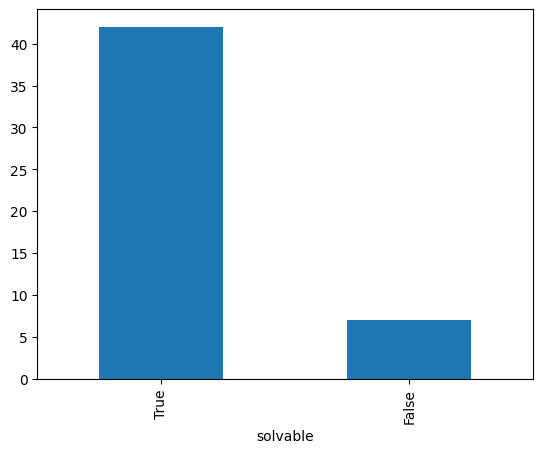

In [4]:
df["solvable"].value_counts().plot(kind="bar")

<Axes: xlabel='hasMultipleResults'>

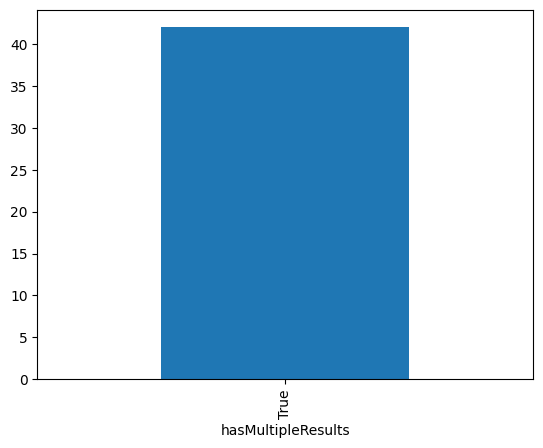

In [5]:
df[df['solvable']]["hasMultipleResults"].value_counts().plot(kind="bar")